<a href="https://colab.research.google.com/github/computational-neurology/workshop2024/blob/main/02_single_node_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions on the previous lecture + Infos + Divide in groups
*30 mins*

# Part 1

<div class="alert alert-block alert-success">
<b>Exercise 0 </b><p>

*10 mins*

**Brainstorm**

Before we start with today's lecture, imagine you are tasked with creating a model of the brain's activity. How would you do it? Please, brainstorm within your group.

You can consider the following aspects, or suggest your own, completely different idea (no one has still been able to model the brain comprehensively, so there is no right or wrong!):

What basic components would you include in your model? Which spatial scale would you model (e.g., each neuron?)

How would you represent the activity and dynamics (e.g., change of activity over time) of these components? What kind of data might help you understand these dynamics?

How would you model the interactions between different brain regions? Are interactions at all important?

Given the complexity of the brain, what simplifications or assumptions would you make to make the modeling process manageable? How might these affect your model's accuracy and applicability?

    
<p>
 -End of exercise-
    </div>

## Building a model of the brain's activity

*Time from the start of the notebook: 40 mins*

*Time for this part: 10 mins*


![emp_scale](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnn.4502/MediaObjects/41593_2017_Article_BFnn4502_Fig1_HTML.jpg?as=webp)

From: Bassett, D., Sporns, O. Network neuroscience. Nat Neurosci 20, 353–364 (2017). https://doi.org/10.1038/nn.4502

![sim_scale](https://www.researchgate.net/profile/Katharina-Glomb/publication/344294740/figure/fig2/AS:936957433622529@1600399468245/A-Illustration-of-computational-models-at-the-three-scales-treated-here-Microscopic.ppm)

From: Glomb K, Cabral J, Cattani A, Mazzoni A, Raj A, Franceschiello B. Computational Models in Electroencephalography. Brain Topogr. 2022 Jan;35(1):142-161. doi: 10.1007/s10548-021-00828-2. Epub 2021 Mar 29. PMID: 33779888; PMCID: PMC8813814.

![WBM](https://media.springernature.com/full/springer-static/image/chp%3A10.1007%2F978-3-030-89439-9_13/MediaObjects/483471_1_En_13_Fig1_HTML.png?as=webp)

From: Griffiths, J.D., Bastiaens, S.P., Kaboodvand, N. (2022). Whole-Brain Modelling: Past, Present, and Future. In: Giugliano, M., Negrello, M., Linaro, D. (eds) Computational Modelling of the Brain. Advances in Experimental Medicine and Biology(), vol 1359. Springer, Cham. https://doi.org/10.1007/978-3-030-89439-9_13




## Recap

*Recap of what was just presented, for your reference*


A possible way to simulate the activity of the brain over time is to use **whole-brain models**.

Whole-brain models encompass a collection of equations that depict the dynamics and interplay among neural populations across various brain regions. In simpler terms, you divide the brain in different regions (remember the parcellations of different colors from the previous lecture) and simulate the activity of each region over time using a differential equation (for those that don't have a maths background, don't be scared, we won't dive into the details). These equations can be either formulated based on an understanding of the biophysical mechanisms that underlie diverse brain activities (biophysical models, e.g., based on specific assumptions like neuronal membrane conductance), or they can be chosen based on the dynamics they generate (phenomenological models, they describe what we see pretty well, even though they don't arise from biological variables). We will dive further into the differences later on.
The local dynamics between different regions are then combined with estimates of anatomical connectivity networks obtained from in vivo measurements (via the structural connectivity matrix we discussed in the previous lecture).

Most whole-brain models thus consist of three fundamental components:

- *Local dynamics:* The activity of each brain region is typically determined by the selected local dynamics along with interaction terms involving other regions (e.g non-linear oscillators, neural field theory, neural mass models, etc.). As previously stated, the spatial scale is a limiting factor. If you were to simulate each neuron, you would have approximately 86 billions equations + 100 trillions of connection (this is if you summarize each neuron with just one free variable)... This is not achievable in real life, so if we want to simulate the whole brain we need to compromise on spatial scale. What we can do is simplify the activity of hundreds of millions of neurons (those composing each of our ROIs, see next) with just one simple equation. So each of our regions will be in the order of 5-10 cm^2.

- *Brain parcellation:* A brain parcellation determines the number of regions and the spatial resolution at which the brain dynamics occur. This parcellation may include cortical, sub-cortical, and cerebellar regions.

- *Anatomical connectivity matrix:* This matrix defines the network of connections between brain regions. Many studies rely on the human connectome, which is derived by estimating the number of white-matter fibers connecting different brain areas using DTI data combined with probabilistic tractography.


In this tutorial we will cover some of the key components involved in computational modelling of single region dynamics. In the next lecture we will try to recreate a whole brain!

But first, what do we mean as dynamics?

<div class="alert alert-block alert-success">
<b>Exercise 1 </b><p>

*10 mins*

Before we move to modeling the brain, we will start with a brief general introduction on dynamical systems. Nonetheless, there are a few keywords that will recur throughout this and future lectures that you should familiarize with. Please run the following cell and try to answer questions 1-5 (not graded). These questions will allow you to start building a foundation of the main terminology used in the field. If you still have time, move forward to the bonus questions 6-10.

In case the cell does not work, click on [this link](https://studio.frameworkconsulting.com/project/8417/shared).

    
<p>



 <div class="alert alert-block alert-success">
 -End of exercise-
</div>


*Time from the start of the notebook: 60 minutes*

## What is a dynamical system anyways?

*15 minutes*

In this part, we will start learning about behavior of dynamical systems -- **systems that evolve in time** -- where the rules by which they evolve in time are described precisely by a differential equation.

Differential equations are equations that express the **rate of change** of the state variable $x$. One typically describes this rate of change using the derivative of $x$ with respect to time ($dx/dt$) on the left hand side of the differential equation:

\begin{equation}
\frac{dx}{dt} = f(x)
\end{equation}

A common notational short-hand is to write $\dot{x}$ for $\frac{dx}{dt}$. The dot means "the derivative with respect to time".

For simplicity, here we will briefly discuss **linear dynamics**, where $f(x)$ is a linear function of $x$. The main concept you should develop an understanding for in this section is that we can solve these equations numerically (versus analytically).

Now, we will:

* Explore and understand the behavior of linear systems where $x$ is a single variable

Let's start by examining an example of a simple one-dimensional differential equation in $x$ of the form

$$\dot{x} = a x$$

where $a$ is a scalar.

Solutions for how $x$ evolves in time when its dynamics are governed by such a differential equation take the form

\begin{equation}
x(t) = x_0 e^{(a t)}
\end{equation}

where $x_0$ is the **initial condition** of the equation -- that is, the value of $x$ at time $0$.
</details>

To gain further intuition, let's explore the behavior of such systems with a simple simulation. We can simulate an ordinary differential equation by approximating or modeling time as a discrete list of time steps $t_0, t_1, t_2, \dots$, such that $t_{i+1}=t_i+dt$. We can get the small change $dx$ over a small duration $dt$ of time from the definition of the differential:

\begin{eqnarray}
\dot x &=& \frac{dx}{dt} \\
dx &=& \dot x\, dt
\end{eqnarray}

So, at each time step $t_i$, we compute a value of $x$, $x(t_i)$, as the sum of the value of $x$ at the previous time step, $x(t_{i-1})$ and a small change $dx=\dot x\,dt$:

\begin{equation}
x(t_i)=x(t_{i-1})+\dot x(t_{i-1}) dt
\end{equation}

This very simple integration scheme, known as **forward Euler integration**, works well if $dt$ is small and the ordinary differential equation is simple. It can run into issues when the ordinary differential equation is very noisy or when the dynamics include sudden big changes of $x$. Such big jumps can occur, for example, in models of excitable neurons. In such cases, one needs to choose an integration scheme carefully. However, for our simple system, the simple integration scheme should work just fine!

In [1]:
# @title Imports, don't forget to run this cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # numerical integration solver

In [2]:
# @title Figure settings, don't forget to run this cell
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
# @title Plotting Functions, don't forget to run this cell
def plot_trajectory(system, params, initial_condition, dt=0.1, T=6,
                    figtitle=None):

  """
  Shows the solution of a linear system with two variables in 3 plots.
  The first plot shows x1 over time. The second plot shows x2 over time.
  The third plot shows x1 and x2 in a phase portrait.

  Args:
    system (function): a function f(x) that computes a derivative from
                        inputs (t, [x1, x2], *params)
    params (list or tuple): list of parameters for function "system"
    initial_condition (list or array): initial condition x0
    dt (float): time step of simulation
    T (float): end time of simulation
    figtitlte (string): title for the figure

  Returns:
    nothing, but it shows a figure
  """

  # time points for which we want to evaluate solutions
  t = np.arange(0, T, dt)

  # Integrate
  # use built-in ode solver
  solution = solve_ivp(system,
                    t_span=(0, T),
                    y0=initial_condition, t_eval=t,
                    args=(params),
                    dense_output=True)
  x = solution.y

  # make a color map to visualize time
  timecolors = np.array([(1 , 0 , 0, i)  for i in t / t[-1]])

  # make a large figure
  fig, (ah1, ah2, ah3) = plt.subplots(1, 3)
  fig.set_size_inches(10, 3)

  # plot x1 as a function of time
  ah1.scatter(t, x[0,], color=timecolors)
  ah1.set_xlabel('time')
  ah1.set_ylabel('x1', labelpad=-5)

  # plot x2 as a function of time
  ah2.scatter(t, x[1], color=timecolors)
  ah2.set_xlabel('time')
  ah2.set_ylabel('x2', labelpad=-5)

  # plot x1 and x2 in a phase portrait
  ah3.scatter(x[0,], x[1,], color=timecolors)
  ah3.set_xlabel('x1')
  ah3.set_ylabel('x2', labelpad=-5)
  #include initial condition is a blue cross
  ah3.plot(x[0,0], x[1,0], 'bx')

  # adjust spacing between subplots
  plt.subplots_adjust(wspace=0.5)

  # add figure title
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_streamplot(A, ax, figtitle=None, show=True):
  """
  Show a stream plot for a linear ordinary differential equation with
  state vector x=[x1,x2] in axis ax.

  Args:
    A (numpy array): 2x2 matrix specifying the dynamical system
    ax (matplotlib.axes): axis to plot
    figtitle (string): title for the figure
    show (boolean): enable plt.show()

  Returns:
    nothing, but shows a figure
  """

  # sample 20 x 20 grid uniformly to get x1 and x2
  grid = np.arange(-20, 21, 1)
  x1, x2 = np.meshgrid(grid, grid)

  # calculate x1dot and x2dot at each grid point
  x1dot = A[0,0] * x1 + A[0,1] * x2
  x2dot = A[1,0] * x1 + A[1,1] * x2

  # make a colormap
  magnitude = np.sqrt(x1dot ** 2 + x2dot ** 2)
  color = 2 * np.log1p(magnitude) #Avoid taking log of zero

  # plot
  plt.sca(ax)
  plt.streamplot(x1, x2, x1dot, x2dot, color=color,
                 linewidth=1, cmap=plt.cm.cividis,
                 density=2, arrowstyle='->', arrowsize=1.5)
  plt.xlabel(r'$x1$')
  plt.ylabel(r'$x2$')

  # figure title
  if figtitle is not None:
    plt.title(figtitle, size=16)

  # include eigenvectors
  if True:
    # get eigenvalues and eigenvectors of A
    lam, v = np.linalg.eig(A)

    # get eigenvectors of A
    eigenvector1 = v[:,0].real
    eigenvector2 = v[:,1].real

    # plot eigenvectors
    plt.arrow(0, 0, 20*eigenvector1[0], 20*eigenvector1[1],
              width=0.5, color='r', head_width=2,
              length_includes_head=True)
    plt.arrow(0, 0, 20*eigenvector2[0], 20*eigenvector2[1],
              width=0.5, color='b', head_width=2,
              length_includes_head=True)
  if show:
    plt.show()


def plot_specific_example_stream_plots(A_options):
  """
  Show a stream plot for each A in A_options

  Args:
    A (list): a list of numpy arrays (each element is A)

  Returns:
    nothing, but shows a figure
  """
  # get stream plots for the four different systems
  plt.figure(figsize=(10, 10))

  for i, A in enumerate(A_options):

    ax = plt.subplot(2, 2, 1+i)
    # get eigenvalues and eigenvectors
    lam, v = np.linalg.eig(A)

    # plot eigenvalues as title
    # (two spaces looks better than one)
    eigstr = ",  ".join([f"{x:.2f}" for x in lam])
    figtitle =f"A with eigenvalues\n"+ '[' + eigstr + ']'
    plot_streamplot(A, ax, figtitle=figtitle, show=False)

    # Remove y_labels on righthand plots
    if i % 2:
      ax.set_ylabel(None)
    if i < 2:
      ax.set_xlabel(None)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

<div class="alert alert-block alert-success">
<b>Exercise 2a </b><p>
Complete the following code to perform the forward Euler Integration scheme.

*15 minutes*

Hint: Look at the equations we just presented above

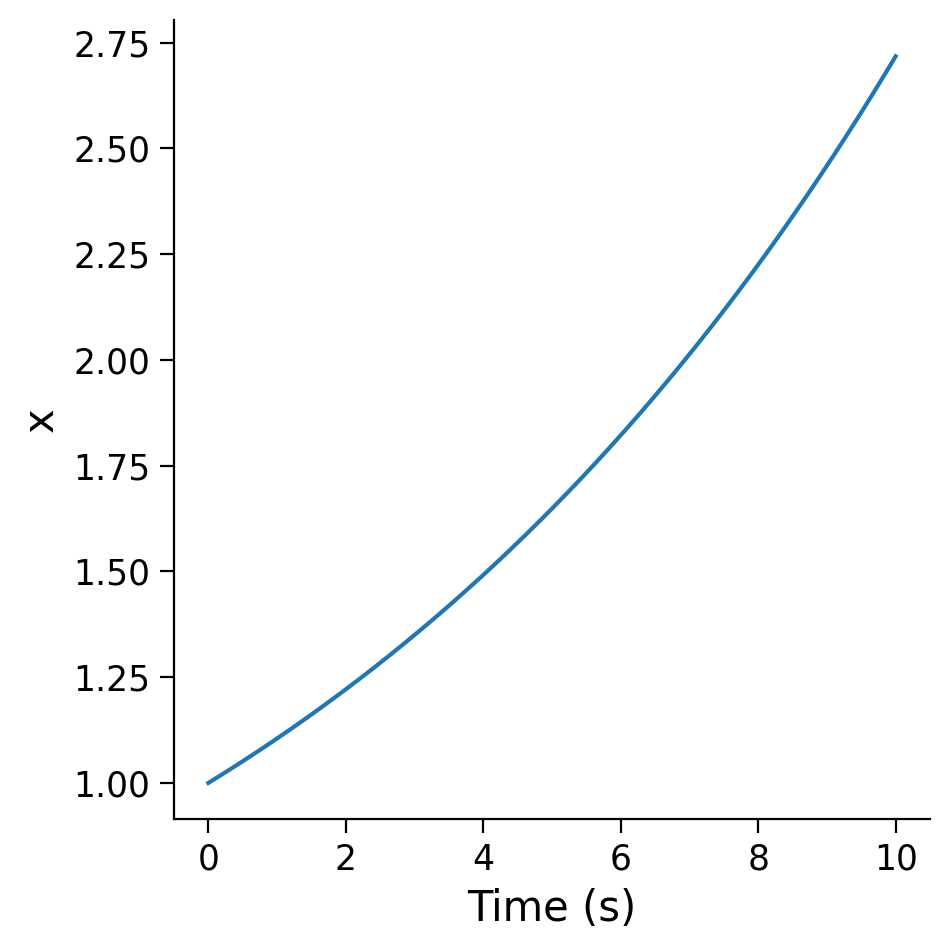

In [4]:
def integrate_exponential(a, x0, dt, T):
  """Compute solution of the differential equation xdot=a*x with
  initial condition x0 for a duration T. Use time step dt for numerical
  solution.

  Args:
    a (scalar): parameter of xdot (xdot=a*x)
    x0 (scalar): initial condition (x at time 0)
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = np.zeros_like(t, dtype=complex)
  x[0] = x0 # This is x at time t_0

  # Step through system and integrate in time
  for k in range(1, len(t)):

    ## Fill out the following
    # xdot = ...
    xdot = x[k-1] * a
    # Update x based on x[k-1] and xdot
    # x[k] = ...
    x[k] = xdot * dt + x[k-1]

  return x, t

# Choose parameters
a = .1    # parameter in f(x)
T = 10      # total Time duration
dt = 0.001  # timestep of our simulation
x0 = 1.     # initial condition of x at time 0

# Use Euler's method
x, t = integrate_exponential(a, x0, dt, T)

# Visualize
plt.figure(figsize = (5,5))
plt.plot(t, x.real)
plt.xlabel('Time (s)')
plt.ylabel('x')
plt.show()

    
<p>
 -End of exercise-
    </div>


<div class="alert alert-block alert-success">
<b>Exercise 2b </b><p>

1.  The $dt$ is the step size of the forward Euler integration. What happens to the numerical solution when you increase $dt$? What happens if you lower it?


Write down your answer:

In [5]:
# @title Make sure you execute this cell to enable the widget!
def plot_slope(dt):
  """
    Args:
      dt  : time-step
    Returns:
      A figure of an exponential, the slope of the exponential and the derivative exponential
  """

  t = np.arange(0, 5+0.1/2, 0.1)


  fig = plt.figure(figsize=(6, 4))
  # Exponential
  p = np.exp(0.3*t)
  plt.plot(t, p, label='x')
  # slope
  plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1+dt))],':og',label=r'$\frac{x(1+\Delta t)-x(1)}{\Delta t}$')
  # derivative
  plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1))+dt*0.3*np.exp(0.3*(1))],'-k',label=r'$\frac{dx}{dt}$')
  plt.legend()
  plt.plot(1+dt, np.exp(0.3*(1+dt)), 'og')
  plt.ylabel('x')
  plt.xlabel('t')
  plt.show()

# Imports
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import IPython.display as ipd
from matplotlib import gridspec
import ipywidgets as widgets  # interactive display
from ipywidgets import Label
%config InlineBackend.figure_format = 'retina'

my_layout = widgets.Layout()

feedback_prefix = "W0D4_T3"

my_layout.width = '450px'
@widgets.interact(

    dt=widgets.FloatSlider(1, min=0., max=4., step=.1,
                                layout=my_layout)

)

def Pop_widget(dt):
  plot_slope(dt)
  plt.show()

interactive(children=(FloatSlider(value=1.0, description='dt', layout=Layout(width='450px'), max=4.0), Output(…

<p>
 -End of exercise-
    </div>


<div class="alert alert-block alert-success">
<b> Bonus Exercise </b><p>

In the following exercise, you can change the real part and imaginary part of $a$ (so a = real + imaginary i)

1. What values of $a$ produce dynamics that both ***oscillate*** and ***grow***?
2. What value of $a$ is needed to produce a stable oscillation of 0.5 Hertz (cycles/time units)?


In [6]:
# @title Make sure you execute this cell to enable the widget!

# parameters
T = 5  # total Time duration
dt = 0.0001  # timestep of our simulation
x0 = 1.  # initial condition of x at time 0

@widgets.interact
def plot_euler_integration(real=(-2, 2, .2), imaginary=(-4, 7, .1)):

  a = complex(real, imaginary)
  x, t = integrate_exponential(a, x0, dt, T)
  plt.figure(figsize=(5,5))
  plt.plot(t, x.real)  # integrate exponential returns complex
  plt.grid(True)
  plt.xlabel('Time (s)')
  plt.ylabel('x')
  plt.show()

interactive(children=(FloatSlider(value=0.0, description='real', max=2.0, min=-2.0, step=0.2), FloatSlider(val…

In [ ]:
# @title Solution, click to check if your idea is correct!
# 1) To make the system both oscillate and grow, real has to be positive,
# and imaginary has to be not zero.

# 2) Stable oscillation of 0.5 Hz (half a cycle per unit time, or one cycle per two
# unit time) is achieved with real = 0 and imaginary = +/- pi
# (approximately 3.1 or -3.1).

<p>
 -End of bonus exercise-
</div>

*Time from the start of the notebook: 90 minutes*

## Pause: 15 minutes

# Part 2

## Node-level dynamics

*Time from the start of the notebook 105 minutes*

*Time for this part: 15 minutes*

Now that we have a general idea of what a dynamical system is and how numerical solutions work, we will start to build our own model of the brain. First, we will code our own simulation, then we will introduce a Python package called [Neurolib](https://github.com/neurolib-dev/neurolib) allowing for easy simulations of whole-brain functional activity.

Neurolib is very fast and easy to use, but there is also other software allowing you to do the same kinds of simulations, like [The Virtual Brain](https://thevirtualbrain.org/tvb/zwei) (TVB). With TVB you also get a graphical user interface if you are yet not too keen on programming, but want to explore whole-brain models while improving your coding skills. The only drawback from TVB is that it is currently pretty slow.

The same concepts you will learn today, though, also apply to TVB or any other whole-brain modeling packages.

## Biophysical versus Phenomenological models of brain activity

Broadly speaking, there are two categories of neural mass models: biophysical and phenomenological.

**Biophysical Models**

Biophysical modeling is an approach that aims to capture the biological details of neural populations. This means that biophysical models are grounded in the biophysical properties of neurons, such as ion channel dynamics, neurotransmitter kinetics, and synaptic plasticity. Biophysical models often incorporate detailed representations of biological entities, such as conductances, which correspond to the flow of ions across neuronal membranes.

**Phenomenological Models**

In contrast to biophysical modeling, phenomenological modeling takes a more abstract and high-level approach. Instead of focusing on the detailed biophysical mechanisms, phenomenological models aim to capture the qualitative behavior and emergent properties of neural systems. This means that we have recordings of empirical data and we have some mathematical equations that try to capture these recordings as best as possible. These models often use mathematical frameworks and computational techniques to describe and simulate the observed phenomena without necessarily incorporating the underlying biological details.

*E.g., You can approximate the hourly temperature over the course of a month with a sinusoidal wave, where the temperature will be higher during the day and lower during the night. You have no idea why, but this still allows you to understand some things (like maybe you have higher excursion between day and night in a place i.e., the desert, compared to another). Here, our model provides a mathematical description of the observed phenomenon (periodic temperature changes) without explaining the reasons behind it, such as the Earth's rotation, atmospheric dynamics, or thermodynamics.*

Another good example to understand these models is the study of bird flocks (see video). For example, in the video you can see how each bird moves on its own, but also the flock itself shows some collective movement. Phenomenologically, we could study for example the centroid of the bird flock and its dispersion and this would give us many insights regarding the collective behavior of these animals.



In [ ]:
# @title Run to show video
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/V4f_1_r80RY?si=b48bVmH2RKoHiOnS&amp;clip=UgkxXnfR53n0TQS9bM4YAsiCLUE1evhLMrTr&amp;clipt=EM2GARjk-wE", width=560, height=315)


<div class="alert alert-block alert-success">
<b> Exercise 4 </b><p>

*5 minutes*

Can you think of some pros and cons for each group of models?

## Pros and cons of each type of model

*5 minutes*


**Pros of biophysical models**:
The strength of biophysical modeling lies in its ability to provide a mechanistic understanding of neural processes by directly linking them to the underlying biological components. These models can help researchers explore how specific biophysical parameters influence neural behavior and test hypotheses about the role of different cellular and molecular mechanisms in shaping neural activity.

**Cons of biophysical models**:
The main downside of these models is that the more biological realism comes with a higher number of coupled differential equations to be solved, up to ~thousands for each neuron (e.g., each type of ion channel should have its own equation, then equations for ion channels on dendrites are different depending on the morphology, and so on). Even with massive computing power and parallelism, this currently poses severe technical limitations on the number of neurons we can simulate at the highest level of biological realism (currently ~ some squared cm). Nonetheless we can use simplified models where we describe with just a couple of differential equations the activity of ~millions of neurons, allowing us to simulate whole-brain activity.

**Pros of phenomenological models**:
Phenomenological models are particularly useful when the precise biological mechanisms are not well understood or when the goal is to study the collective behavior of large-scale neural networks. These models can provide insights into the computational principles and information processing capabilities of neural systems, without being constrained by the complexities of biological details. This allows to run several modeling simulations at a large-scale in many individuals, which is currently much more computationally expensive with biophysically detailed models

**Cons of phenomenological models**:
Being phenomenological, these models do not allow us to delve into the molecular, biophysical and cellular mechanisms. This is a great limitation if you want to know exactly what to change in order to achieve a particular state and how to do it.


While biophysical and phenomenological modeling approaches may seem distinct, they are often complementary in computational neuroscience and many models share some degree of both approaches. Biophysical models can inform and constrain phenomenological models by providing a biological foundation and validating the assumptions made in the abstract models. Conversely, phenomenological models can guide the development of biophysical models by identifying relevant phenomena and suggesting potential mechanisms to be explored.

*Time from the beginning of the notebook: 130 minutes*

## Normal form of a supercritical Hopf bifurcation

*10 minutes*


We will start by simulating single node activity, using a phenomenological non-linear model of coupled oscillators knowns as the **Stuart-Landau model**
and commonly referred to in the neuroscience context as the **Hopf model** (more precisely as the *normal form of a supercritical Hopf bifurcation*). This model is a canonical model to study systems of coupled oscillators for which both the phase and the amplitude interact. In this model, as nonlinearities increase, isolated nodes transit through two qualitatively different dynamics: from damped oscillations to self-sustained oscillations. Today we will focus on these dynamics. The dynamics of a single uncoupled node $i$ is given by the following differential equation, with complex variable $z$ as the state variable:

$$\dot{z}_{i} = (a_{i} + i\omega_{i})z_{i} - z_{i} |z_{i}^2| $$


The real part of $z$ is what we measure empirically, its imaginary part serves only for the equations, we can then write:

$$\dot{x}_{i} = (a_{i} - x_{i}^{2} - y_{i}^{2})x_{i} - \omega_{i}y_{i}$$

$$\dot{y}_{i} = (a_{i} - x_{i}^{2} - y_{i}^{2})y_{i} + {\omega}{i}x_{i} $$

$a$ is known as a bifurcation parameter and $\omega$ is the natural frequency of oscillation.

- If $a<0$ the system is characterised by a single stable point and
- if $a>0$ a limit cycle emerges and the system oscillates harmonically, with frequency $\omega$.
- The bifurcation point, is thus at $a=0$.

A bifurcation point is a point where a small change in system's parameters leads to big changes in the behavior (e.g., transition from stable point to oscillatory behavior). Supercritical means that a pair of stable point is created and exists after the bifurcation. "Hopf" is the name of the type of the bifurcation. Normal form means that the bifurcation occurs at 0.


## Phase plane

*10 minutes*

Before we move on to simulating our node, let's briefly introduce a very useful tool to check how the system behaves: the phase plane (or phase space if you have more than 2D). In applied mathematics, in particular in the context of dynamical  system analysis, a phase plane is a visual display of certain characteristics of certain kinds of differential equations; a coordinate plane with axes being the values of the two state variables, say (x, y), or (q, p) etc. (any pair of variables). It is a two-dimensional case of the general n-dimensional phase space. In other words, a phase space or state space is a space in which all possible "states" of a dynamical system are represented, with each possible state corresponding to one unique point in the phase space.

![phase plane](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Simple_Harmonic_Motion_Orbit.gif/330px-Simple_Harmonic_Motion_Orbit.gif)

*From [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Simple_Harmonic_Motion_Orbit.gif/330px-Simple_Harmonic_Motion_Orbit.gif)*

### Explaining the Phase Plane

The image shows what's called a phase plane representation of simple harmonic motion. A phase plane is a way to visualize the relationship between the state variables of this system, in this case the object's position and its velocity (speed and direction of motion) at any given time.

Here's how to understand the phase plane in the image (on the right):

1. The vertical axis (y-axis) represents the object's position. The higher up, the higher the real position, and the lower down, the lower the position.

2. The horizontal axis (x-axis) represents the object's velocity. The farther to the right, the more positive the velocity (moving upwards), and the farther to the left, the more negative the velocity (moving downards).

3. The oval or elliptical shape traced out in the phase plane shows how the object's position and velocity change together over time as it undergoes this simple harmonic motion.

4. At the top and bottom points of the oval, the object's position is at its maximum positive or negative value, but its velocity is zero (it momentarily stops before reversing direction).

5. At the rightmost and leftmost bottom points of the oval, the object's velocity is at its maximum positive or negative value, but its position is zero (it crosses the equilibrium or center point).

6. As the object moves along the oval path, its position and velocity are constantly changing, but in a repeating, cyclical pattern. This represents the periodic nature of simple harmonic motion.

So, the phase plane provides a visual way to see how an object's position and velocity are related and evolve together during its back-and-forth, oscillatory motion.

In this example, it is important to note that each point in the phase plane represents the state of the system at a particular point in time.


In [ ]:
import sys
!{sys.executable} -m pip install neurolib
# @title Run this to install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.0/315.0 kB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55003 sha256=2f267d0843ac1fb83d805f5e9c89d0fee5f2d46d9fc91773463a0cc1c02b3c5b
  Stored in directory: /root/.cache/pip/wheels/42/e3/4e/94b61188e5e3e62ba27e9586da5ecc7ea0f24e26916a250cc7
  Created wheel for pypet: filename=pypet-0.6.1-py3-none-any.whl size=345818 sha256=dd

<div class="alert alert-block alert-success">
<b> Exercise 5 </b><p>

*10 minutes*

Implement the normal form of a supercritical Hopf bifurcation in the following function.

In [ ]:
# Parameters
a = -0.1  # Bifurcation parameter
omega = 1  # Angular frequency

# Initial conditions
x0 = 0.1
y0 = 0.1

# Time span and step size
t_start = 0.0
t_end = 100.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

# Supercritical Hopf bifurcation normal form
def hopf_normal_form(x, y, a, omega):
    # Your code here
    # dx_dt = ...
    # dy_dt = ...

    # Left now for testing
    dx_dt = (a - x**2 - y**2) * x - omega * y
    dy_dt = (a - x**2 - y**2) * y + omega * x


    return dx_dt, dy_dt

<div class="alert alert-block alert-success">
<b> Exercise 6 </b><p>

*5 minutes*

Now perform the Euler Integration as we did before.

In [ ]:
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0

for i in range(1, len(t)):
    dx, dy = hopf_normal_form(x[i-1], y[i-1], a, omega)
    # x[i] = ...
    # y[i] = ...
    x[i] = x[i-1] + dx * dt
    y[i] = y[i-1] + dy * dt

<div class="alert alert-block alert-success">
<b> Exercise 7 </b><p>

*5 minutes*

Finally, let's try to plot the phase plane (on the left) and the evolution of the signal x over time. Remember the difference between the two!

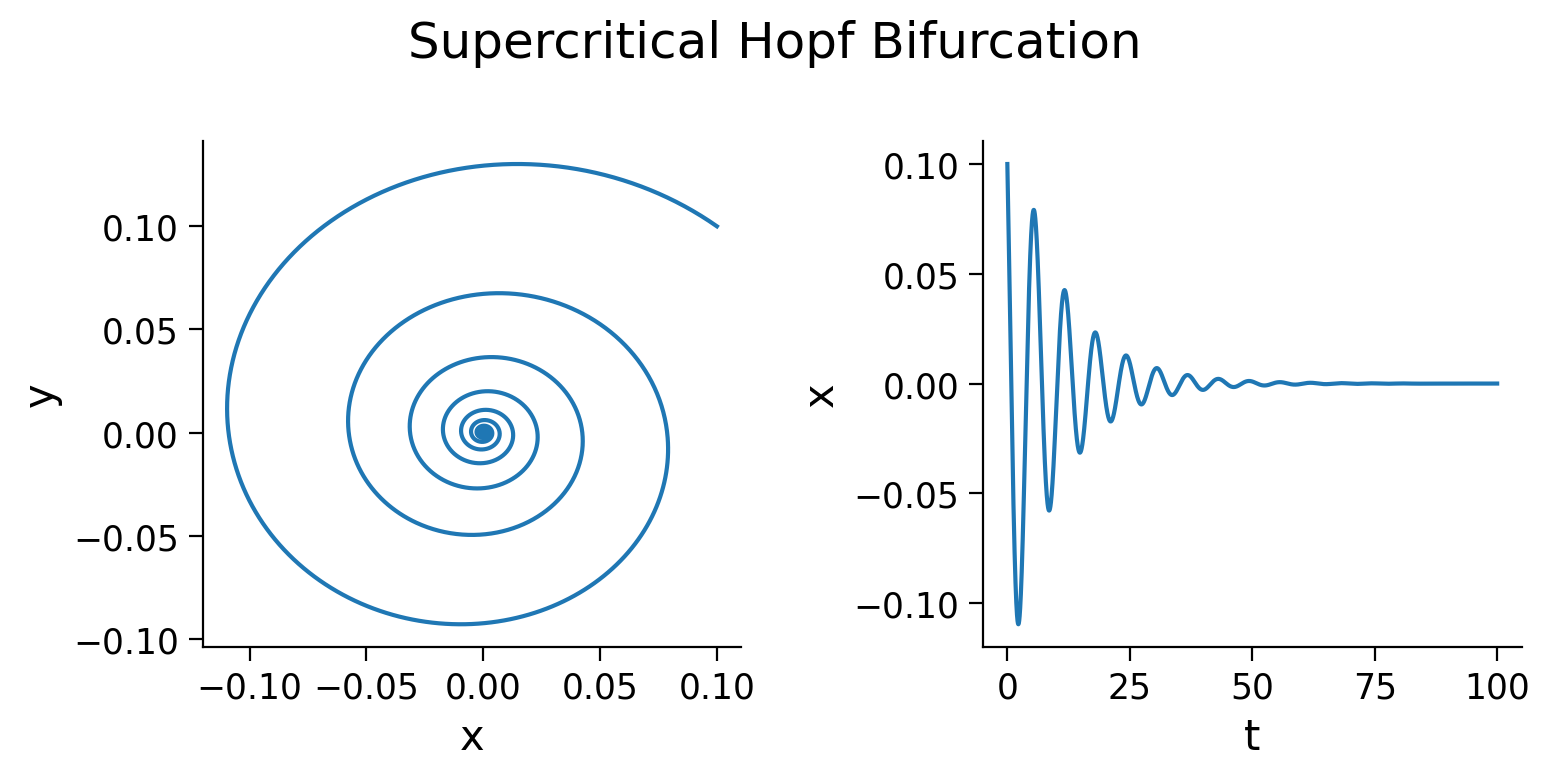

In [ ]:
# Plotting
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
#axs[0].plot(...)
axs[0].plot(x, y)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(t, x)
# axs[1].plot(...)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')

fig.suptitle('Supercritical Hopf Bifurcation')
fig.tight_layout()
fig.show()

<div class="alert alert-block alert-success">
<b> Bonus 1</b><p>

Is the system going to a stable point or spiraling outwards? How do you know? How can you check?

<div class="alert alert-block alert-success">
<b> Bonus 2</b><p>

What happens if you add Gaussian noise to x[i] and y[i]?

After having created our simulation from scratch, we will now use the faster Neurolib to perform the simulation. First, let's recreate the same type of simulations (note Neurolib uses random initial conditions, so it won't be exactly the same, but the behavior is)

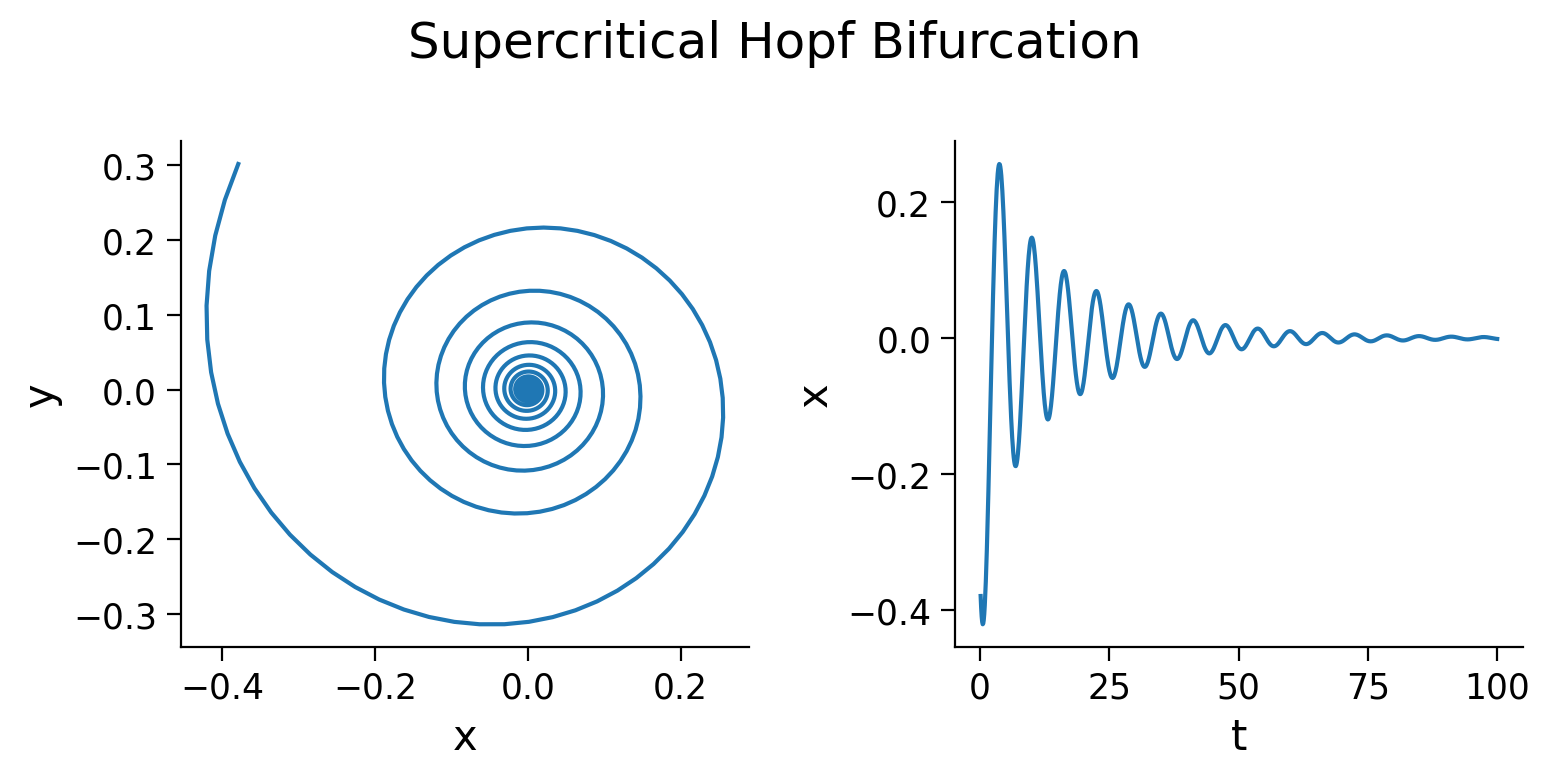

In [ ]:
# Let's import the Hopf model
from neurolib.models.hopf import HopfModel

model = HopfModel()
model.params['duration'] = 100
model.params['sigma_ou'] = 0.00
model.params['a'] = -0.1
model.params["w"] = 1

model.run()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
axs[0].plot(model.x.T, model.y.T)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].plot(model.t, model.x.T)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x')
fig.suptitle('Supercritical Hopf Bifurcation')
fig.tight_layout()

<div class="alert alert-block alert-success">
<b> Exercise 8 </b><p>

*5 minutes*

Use the following widget to see how the activity changes in relation to the bifurcation parameters and intrinsic frequency. What do you see? When does the behavior change?

In [ ]:
from ipywidgets import interact, FloatSlider

# Function to update plot
def update_plot(bif_param, frequency):
    model.params['a'] = bif_param
    model.params['w'] = frequency
    model.run()
    plt.figure(figsize=(4, 4))
    plt.plot(model.t, model.x.T, c='k', lw=2)
    plt.xlabel("t [ms]")
    plt.ylabel("Activity")
    plt.title(f"$a$: {bif_param}\n $\omega$: {frequency}")
    plt.grid(True)
    plt.show()

# Initialize model
model = HopfModel()
model.params['duration'] = 1.0 * 1000
model.params['sigma_ou'] = 0.0 # Noise
model.params['w'] = .1

model.run()

# Create interactive widget
interact(update_plot, bif_param=FloatSlider(min=-0.3, max=0.3, step=0.01, value=0.2),frequency=FloatSlider(min=0.0, max=0.3, step=0.01, value=0.1));
# @title Run this to enable the interactive widget


interactive(children=(FloatSlider(value=0.2, description='bif_param', max=0.3, min=-0.3, step=0.01), FloatSlid…

Text(0, 0.5, 'Min / max x')

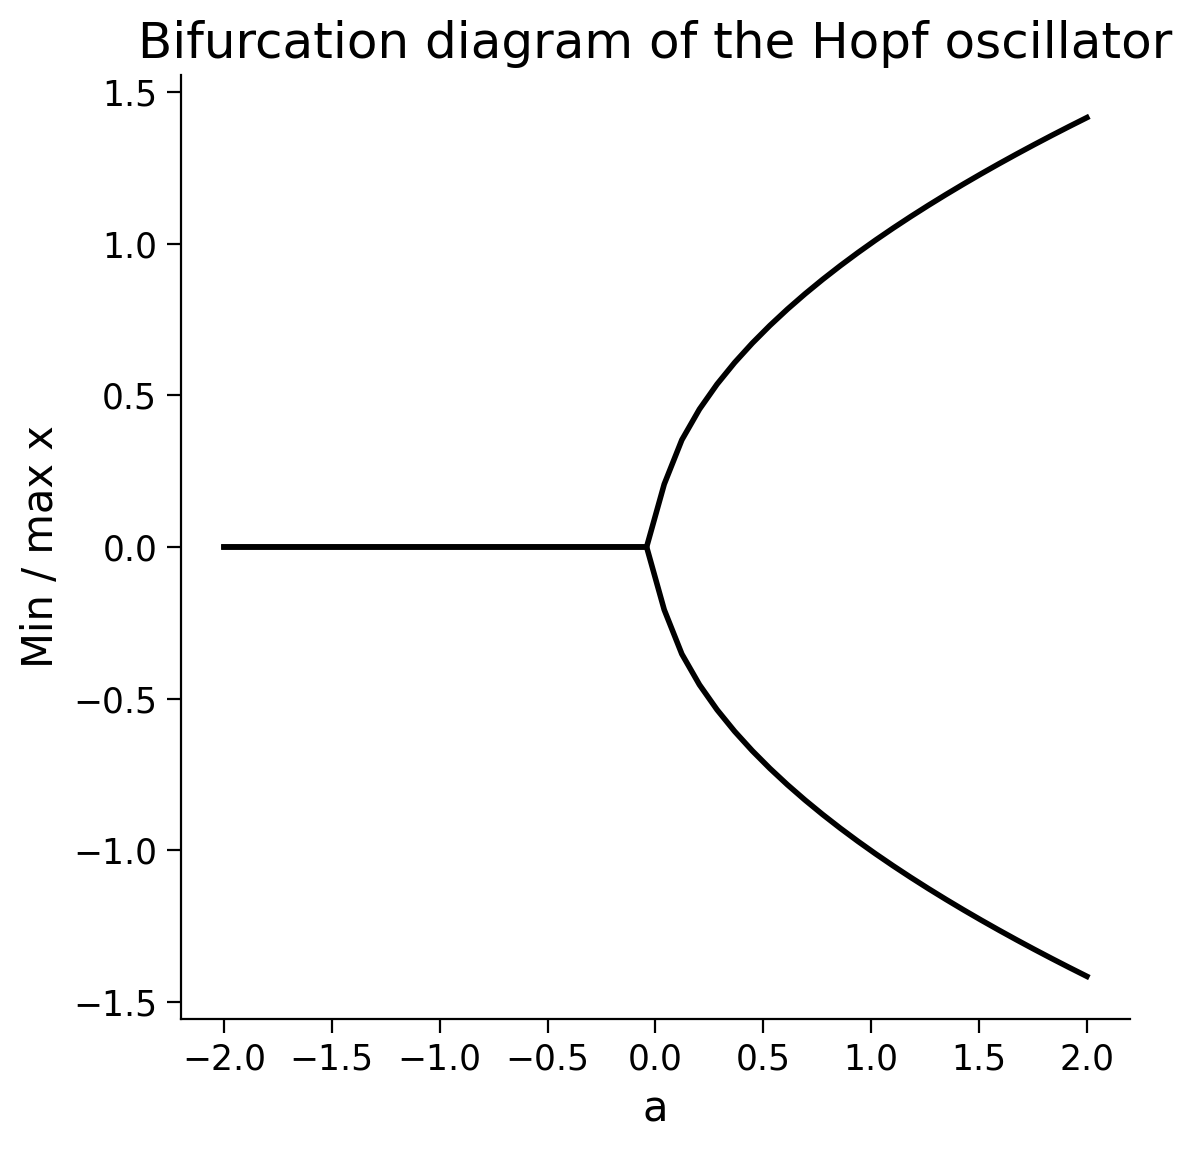

In [ ]:
model = HopfModel()
model.params['duration'] = 2.0*1000

max_x = []
min_x = []
# these are the different input values that we want to scan
a_s = np.linspace(-2, 2, 50)
for a in a_s:
    model.params['a'] = a
    model.run()
    # we add the maximum and the minimum of the last second of the
    # simulation to a list
    max_x.append(np.max(model.x[0, -int(1000/model.params['dt']):]))
    min_x.append(np.min(model.x[0, -int(1000/model.params['dt']):]))

plt.figure(figsize=(6,6))
plt.plot(a_s, max_x, c='k', lw = 2)
plt.plot(a_s, min_x, c='k', lw = 2)
plt.title("Bifurcation diagram of the Hopf oscillator")
plt.xlabel("a")
plt.ylabel("Min / max x")
# @title Run this to plot the bifurcation diagram and see why it is called a bifurcation

## Conclusions

With this notebook you should have developed an initial understanding of:

- **Dynamical systems**
- **Neural mass modeling**
- **Implementing single node dynamics**

Having gained an understanding of how modeling a single/few regions works and different parameter configurations impact their dynamics, in the next lecture we will expand our analysis to the whole-brain level at a macro-scale, dividing the brain into sub-regions and connecting them using structural connectome data derived from Diffusion Weighted Imaging data.


# Acknowledgments
Parts of this tutorial were taken from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/intro.html). Their course on Computational Neuroscience delves into many more details on dynamical systems and biophysically detailed neural mass models. If you are interested in these topics, it is free to follow at your own pace.

[TVB](https://wiki.ebrains.eu/bin/view/Collabs/documentation/tutorials/The%20Virtual%20Brain/) also offers some more tutorials



## Further material for those interested

*Visual understanding of differential equations and Euler integration*

[Visual introduction to differential equations](https://www.youtube.com/watch?v=p_di4Zn4wz4)

[Euler Integration Scheme](https://www.youtube.com/watch?v=q87L9R9v274)

___

*Introduction to WBM*

- C. Cakan, N. Jajcay, K. Obermayer, neurolib: A Simulation Framework for Whole-Brain Neural Mass Modeling. Cogn Comput (2021). https://doi.org/10.1007/s12559-021-09931-9.

- A. Pathak, D. Roy, A. Banerjee, Whole-Brain Network Models: From Physics to Bedside. Front Comput Neurosci 16, 866517 (2022).

- Griffiths, J.D., Bastiaens, S.P., Kaboodvand, N. (2022). Whole-Brain Modelling: Past, Present, and Future. In: Giugliano, M., Negrello, M., Linaro, D. (eds) Computational Modelling of the Brain. Advances in Experimental Medicine and Biology(), vol 1359. Springer, Cham. https://doi.org/10.1007/978-3-030-89439-9_13 (*general concepts + history, it should be available through RUB online*)

- Models of the Mind: How Physics, Engineering and Mathematics Have Shaped Our Understanding of the Brain by Grace Lindsay (this is a interesting entry-level book on the history of computational neuroscience and how mathematical models have been used to explore properties of the brain)

___
*Dynamical systems in WBM*

- M. Breakspear, Dynamic models of large-scale brain activity. Nat Neurosci 20, 340–352 (2017) (*general principles*)

- P. Sanz-Leon, S. A. Knock, A. Spiegler, V. K. Jirsa, Mathematical framework for large-scale brain network modeling in The Virtual Brain. NeuroImage 111, 385–430 (2015) (*all the math we did not cover today is presented here*)


___
*Criticality*

- J. O’Byrne, K. Jerbi, How critical is brain criticality? Trends in Neurosciences 45, 820–837 (2022).

- L. Cocchi, L. L. Gollo, A. Zalesky, M. Breakspear, Criticality in the brain: A synthesis of neurobiology, models and cognition. Progress in Neurobiology 158, 132–152 (2017).

___
*Moving towards clinical applications*

- G. Deco, V. K. Jirsa, A. R. McIntosh, Resting brains never rest: computational insights into potential cognitive architectures. Trends Neurosci 36, 268–274 (2013).

- G. Deco, M. L. Kringelbach, Great Expectations: Using Whole-Brain Computational Connectomics for Understanding Neuropsychiatric Disorders. Neuron 84, 892–905 (2014).

- X. Kobeleva, et al., Advancing brain network models to reconcile functional neuroimaging and clinical research. NeuroImage: Clinical 36, 103262 (2022).


